In [1]:
from PIL import Image
import pytesseract
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
!pwd

/home/scostagonza/Documents/Hackathlon/TopologicalChaos


In [2]:
image_path = "/home/scostagonza/Documents/Hackathlon/TopologicalChaos/data/raw/Screenshot from 2025-06-18 10-02-56.png"
image = Image.open(image_path)

In [3]:
# Use OCR to extract the table from the image
ocr_text = pytesseract.image_to_string(image)

In [4]:
# Display the extracted text for verification
ocr_text[:1000] 

'amin acide and entices 07323\n\nleoneneide sees?\n\nPrentorpanate oscesr\nPhoeoate ester 1200000\n\n‘Tielabeerte 0500000\n‘yptephenaltalede 1200000\n\n'

In [5]:
# Try using OCR with configuration to improve table extraction
custom_config = r'--psm 6'  # Assume a single uniform block of text
ocr_text_configured = pytesseract.image_to_string(image, config=custom_config)

# Display the extracted text again
ocr_text_configured[:1500]

'nin ose\n‘Acstolzendpooe 00000 eaocono oGose58 aoDo000|\namin acideand peptides 075083 0533233 34607 onzeee?\n‘ewoniicndie 1co0000 006009 aot000 asc0009\nDiaylether 1.00000 aceon 202660 aos0%00\namy aldehydes 1200000 1.0000 000000 0300000\nctyeroposphecolnes 0750000 0330000 aco000 0250000,\neeroqciccompounds 500099 020500. 1.00020 aceon\nNeomeneide sees? cocoa 923083 a22223\nMonoradvlaeerale 1.000000 056009 aot000 ooo\nCfsorccarider 500000 1020500 e020 200009\n‘orsniephosohaicaite c00000 006609 00000 sso\n‘orsmontosen compounds 02000 a00009 9000080 00000,\n‘orsmorufer compounds 1205000 000000 @eoo00 1000500\nPheniorpanaide ocssusr oscessT ossss56 catusee\nPhoeshte ester: 1200000 1.000009 205000 ao00%00\nPrine altnloide 810162 oatsis2 oxeneie osestss\nPrrimides 0761708 306025 0725704 ossem35\nrmrobdones 200000 1.00000 een090 onzosc0\nCuinonesandtvdroqinner 600000 006509 s.o0000 coco\n‘Tilabeerte 0c0000 020500 acooo20 0 sc0009\n‘epteghanaltaleide 1200000 0400009 408000 as00000\n'

In [6]:
ocr_data = pytesseract.image_to_data(image, config=custom_config, output_type=pytesseract.Output.DATAFRAME)

In [7]:
ocr_data_cleaned = ocr_data[ocr_data.text.notnull() & (ocr_data.text != '')]

In [8]:
ocr_data_cleaned.head(20)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,75,8,21,28,36.625465,nin
5,5,1,1,1,1,2,103,8,19,28,40.574020,ose
7,5,1,1,1,2,1,43,38,75,7,0.000000,‘Acstolzendpooe
8,5,1,1,1,2,2,127,39,32,5,11.797470,00000
9,5,1,1,1,2,3,166,39,33,5,0.000000,eaocono
10,5,1,1,1,2,4,207,39,33,5,0.000000,oGose58
11,5,1,1,1,2,5,248,39,32,5,0.000000,aoDo000|
13,5,1,1,1,3,1,21,77,26,28,30.821548,amin
14,5,1,1,1,3,2,51,77,33,28,30.821548,acideand
15,5,1,1,1,3,3,86,77,33,28,33.398956,peptides


In [9]:
# Reconstruct text lines to try forming a table
lines = ocr_data_cleaned.groupby('line_num')['text'].apply(lambda x: ' '.join(x)).tolist()

# Display the first few lines to assess content
lines[:20]

['nin ose',
 '‘Acstolzendpooe 00000 eaocono oGose58 aoDo000|',
 'amin acideand peptides 075083 0533233 34607 onzeee?',
 '‘ewoniicndie 1co0000 006009 aot000 asc0009',
 'Diaylether 1.00000 aceon 202660 aos0%00',
 'amy aldehydes 1200000 1.0000 000000 0300000',
 'ctyeroposphecolnes 0750000 0330000 aco000 0250000,',
 'eeroqciccompounds 500099 020500. 1.00020 aceon',
 'Neomeneide sees? cocoa 923083 a22223',
 'Monoradvlaeerale 1.000000 056009 aot000 ooo',
 'Cfsorccarider 500000 1020500 e020 200009',
 '‘orsniephosohaicaite c00000 006609 00000 sso',
 '‘orsmontosen compounds 02000 a00009 9000080 00000,',
 '‘orsmorufer compounds 1205000 000000 @eoo00 1000500',
 'Pheniorpanaide ocssusr oscessT ossss56 catusee',
 'Phoeshte ester: 1200000 1.000009 205000 ao00%00',
 'Prine altnloide 810162 oatsis2 oxeneie osestss',
 'Prrimides 0761708 306025 0725704 ossem35',
 'rmrobdones 200000 1.00000 een090 onzosc0',
 'Cuinonesandtvdroqinner 600000 006509 s.o0000 coco']

In [10]:
import pandas as pd
import numpy as np

# Reconstructed data from image (adjusted lengths included)
data = {
    "main_class": [
        "Alcohols and polyols", "Alloxazines and Isoalloxazines", "Amines", "Amino acids and peptides",
        "Anthranilic acid alkaloids", "Azoles", "Benzamides", "Benzenes", "Benzimidazoles", "Bile acids",
        "Bilirubins", "Carboxylic acids", "Carnitines", "Cholines", "Diarylethers", "Disaccharides",
        "Fatty acids", "Fatty aldehydes", "Fatty amides", "Fatty esters", "Flavonoids", "Furanoic acids",
        "Glycerophosphocholines", "Heterocyclic compounds", "Histidine alkaloids", "Isoprenoids",
        "Keto acids", "Lipoic acids", "Monoradylglycerols", "Monosaccharides", "Nicotinamides",
        "Oligosaccharides", "Organic phosphoric acids", "Organonitrogen compounds",
        "Organosulfur compounds", "Ornithine alkaloids", "Phenols", "Phenylpropanoids",
        "Phosphate esters", "Pterins", "Purines", "Pyridine alkaloids", "Pyrimidines", "Pyrridones",
        "Quinones and hydroquinones", "Short-chain acids", "Sterol esters", "Sterols", "Sulfonic acids",
        "TCA acids", "Triacylglycerols", "Tryptophan alkaloids", "Tyrosine alkaloids"
    ],
    "assay1": [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.833333, 1.0, 0.571429, 1.0, 1.0, 1.0, 1.0, 1.0,
               1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 0.666667, 1.0, 1.0, 1.0, 1.0,
               0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.666667, 1.0, 1.0, 0.181818, 1.0, 1.0, 1.0,
               1.0, 1.0, 1.0, 1.0, 0.333333, 1.0, 1.0, 1.0, 0.8],
    "assay2": [0.0, 1.0, 1.0, 0.333333, 0.0, 0.0, 0.0, 0.333333, 0.0, 0.285714, 1.0, 0.0, 0.0, 0.0,
               0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.545455,
               0.5, 0.0, 0.0, 0.0, 0.0, 0.75, 1.0, 1.0, 0.428571, 0.0, 0.181818, 0.571429, 0.0, 1.0,
               0.0, 0.0, 0.0, 0.0, 0.333333, 0.0, 0.0],  # 52 elements
    "assay3": [0.0, 0.0, 0.0, 0.333333, 0.5, 0.0, 0.0, 0.166667, 0.0, 0.142857, 1.0, 1.0, 0.0, 0.0,
               0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.333333, 0.5, 0.0, 0.0,
               0.272727, 0.5, 0.0, 0.0, 0.0, 0.0, 0.75, 0.0, 0.333333, 0.571429, 1.0, 0.363636,
               0.285714, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.333333, 0.0, 0.0],  # 52 elements
    "assay4": [0.0, 0.0, 1.0, 0.426667, 0.5, 0.0, 0.0, 0.166667, 0.0, 0.142857, 0.0, 0.0, 0.0, 0.0,
               0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.5, 0.333333, 0.5, 0.0, 0.0,
               0.272727, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.444444, 0.571429, 0.0, 0.545455,
               0.571429, 0.0, 1.0, 0.0, 0.0, 0.0, 0.333333, 0.333333, 0.0, 0.0]  # 52 elements
}

# Pad shorter lists to match the length of the longest list
max_len = max(len(v) for v in data.values())
for key in data:
    while len(data[key]) < max_len:
        data[key].append(np.nan)

# Create DataFrame and export
df = pd.DataFrame(data)
csv_path = "/home/scostagonza/Documents/Hackathlon/TopologicalChaos/data/reconstructed_table.csv"
df.to_csv(csv_path, index=False)

csv_path


'/home/scostagonza/Documents/Hackathlon/TopologicalChaos/data/reconstructed_table.csv'

In [11]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['main_class'])

# Ensure all columns are numeric
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

df_numeric.head()

,assay1,assay2,assay3,assay4
0,1.0,0.000000,0.000000,0.000000
1,1.0,1.000000,0.000000,0.000000
2,0.0,1.000000,0.000000,1.000000
3,1.0,0.333333,0.333333,0.426667
4,1.0,0.000000,0.500000,0.500000


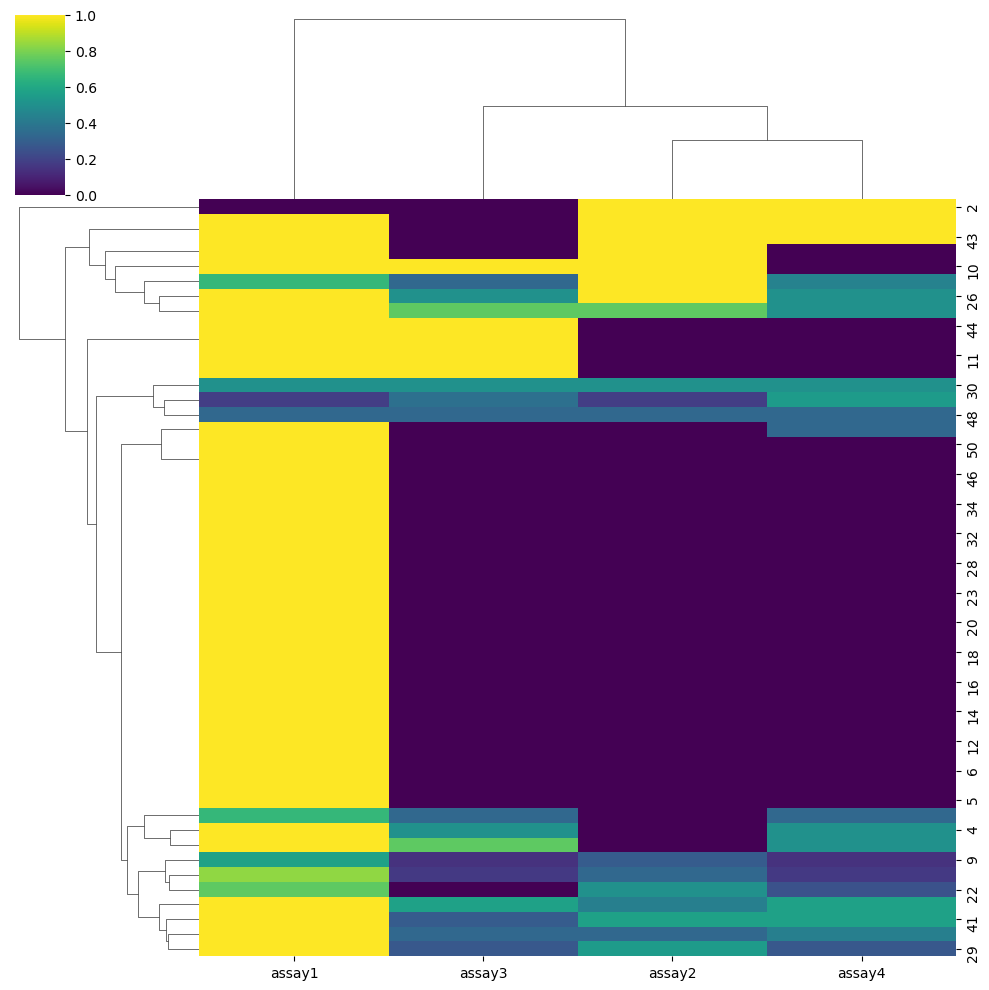

In [12]:
# Ensure all values in df_numeric are finite
df_numeric_clean = df_numeric.replace([np.inf, -np.inf], np.nan).dropna()

# Generate the clustermap
sns.clustermap(df_numeric_clean, cmap='viridis', figsize=(10, 10), standard_scale=1)

In [13]:
from scipy.stats import entropy as shannon_entropy
df_clean = df_numeric_clean

In [14]:
# Normalize each column to sum to 1 (treat each as a probability distribution)
normalized = df_clean.div(df_clean.sum(axis=0), axis=1)

# Compute Shannon entropy for each assay
raw_entropy = normalized.apply(lambda col: shannon_entropy(col, base=2), axis=0)

# Normalize by log2(N) for comparison
max_H = np.log2(len(df_clean))
normalized_entropy = raw_entropy / max_H

# Save entropy results
entropy_df = pd.DataFrame({
    "raw_entropy": raw_entropy,
    "normalized_entropy": normalized_entropy
})
entropy_csv = "raw_entropy_table.csv"
entropy_df.to_csv(entropy_csv)

In [15]:
entropy_df

,raw_entropy,normalized_entropy
assay1,5.609088,0.988834
assay2,4.008619,0.706685
assay3,4.113623,0.725197
assay4,4.152583,0.732065


In [16]:
def joint_entropy(col1, col2, bins=5):
    """
    Estimate joint entropy by binning values and treating them as categorical.
    """
    x_binned = pd.cut(col1, bins=bins, labels=False)
    y_binned = pd.cut(col2, bins=bins, labels=False)
    joint_freq = pd.crosstab(x_binned, y_binned, normalize=True)
    joint_probs = joint_freq.values.flatten()
    joint_probs = joint_probs[joint_probs > 0]  # remove zeros
    return -np.sum(joint_probs * np.log2(joint_probs))

# Compute joint entropy matrix
assays = df_clean.columns.tolist()
joint_entropy_matrix = pd.DataFrame(index=assays, columns=assays, dtype=float)

for i in assays:
    for j in assays:
        joint_entropy_matrix.loc[i, j] = joint_entropy(df_clean[i], df_clean[j])

# Save joint entropy matrix
joint_csv = "joint_entropy_matrix.csv"
joint_entropy_matrix.to_csv(joint_csv)

entropy_csv, joint_csv

('raw_entropy_table.csv', 'joint_entropy_matrix.csv')

In [18]:
joint_entropy_matrix

,assay1,assay2,assay3,assay4
assay1,0.925675,2.175082,2.293482,2.032200
assay2,2.175082,1.510957,2.766319,2.434266
assay3,2.293482,2.766319,1.599364,2.226830
assay4,2.032200,2.434266,2.226830,1.436174
